# Problem: Predict Telecommunications Customer Churn

### I work in the telecommnunications industry so this is a topic of interest. I will use 18 features, 15 of which are categorical and three numerical. Based on certain aspects of the customer (i.e. gender, services, cost), I will try to predict whether a customer is likely to remain with the company for the next year or if they are likely to churn.

### I will explore the data, clean the data, prepare the data and build a model that I will use to make predictions.

## Import and download

In [327]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [328]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Explore the data

### check for null values

In [329]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Check stats of numerical data

In [330]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [331]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [332]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

### Check dtypes

In [333]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [334]:
df_cat = df.select_dtypes(include = ['object']).copy()

### Check distributions of data and check for correlations

<AxesSubplot:ylabel='Density'>

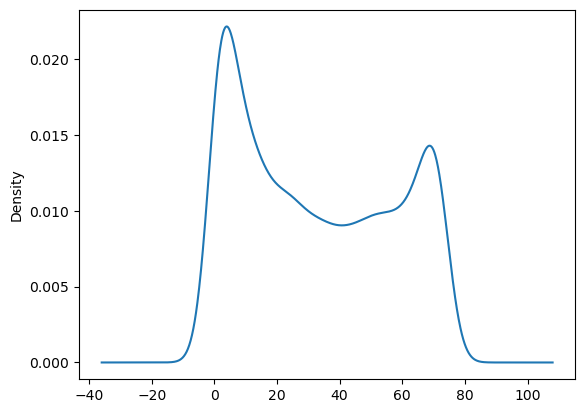

In [335]:
df.tenure.plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

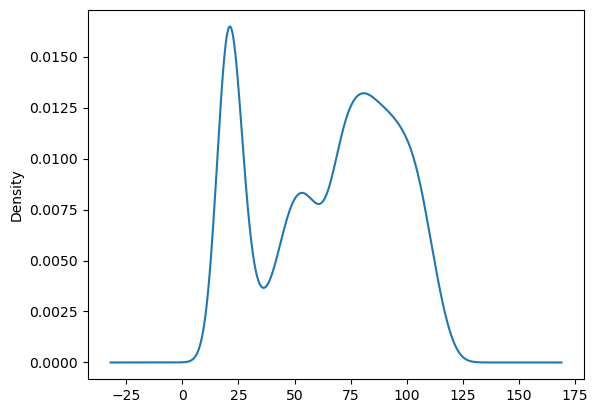

In [336]:
df.MonthlyCharges.plot(kind = 'kde')

<AxesSubplot:>

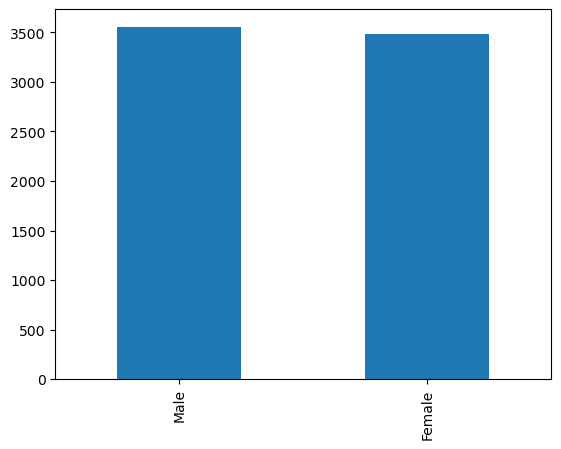

In [337]:
df.gender.value_counts().plot(kind = 'bar')

<AxesSubplot:>

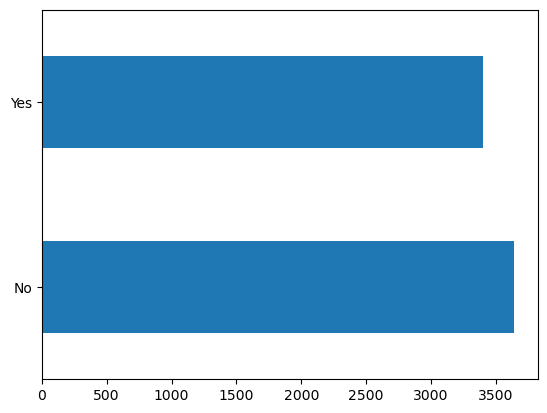

In [338]:
df.Partner.value_counts().plot(kind = 'barh')

<AxesSubplot:>

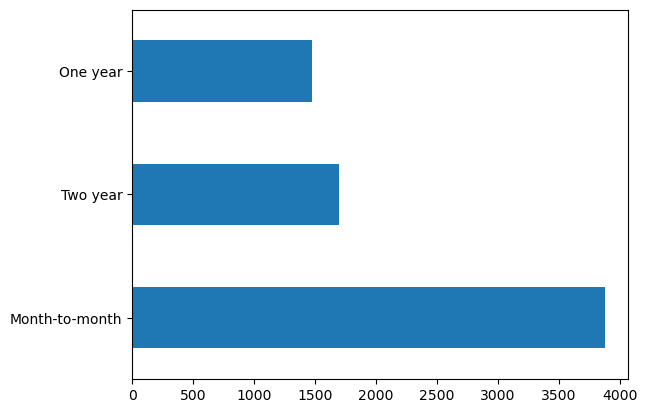

In [339]:
df.Contract.value_counts().plot(kind = 'barh')

<AxesSubplot:>

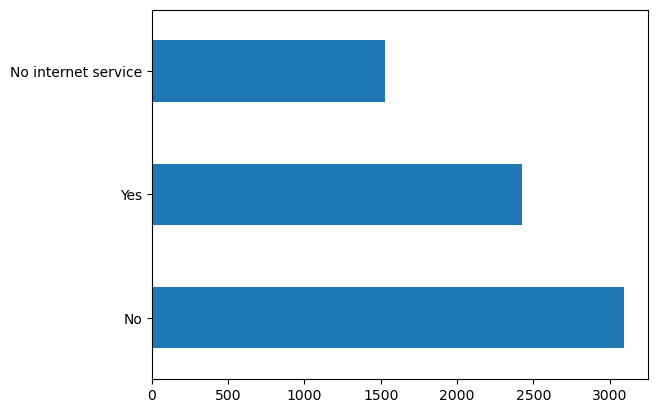

In [340]:
df.DeviceProtection.value_counts().plot(kind = 'barh')

<AxesSubplot:>

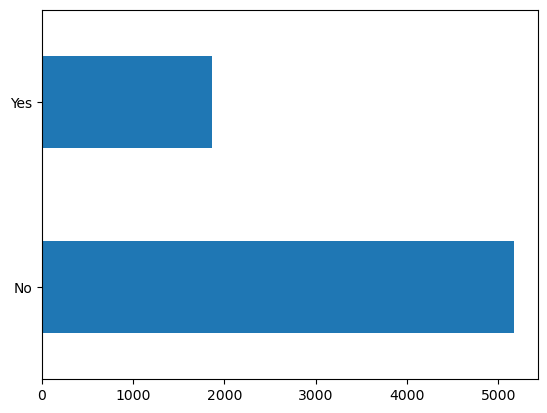

In [341]:
df.Churn.value_counts().plot(kind = 'barh')

In [342]:
df_corr = df[['MonthlyCharges', 'TotalCharges']]
df_corr = df_corr.corr()

df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

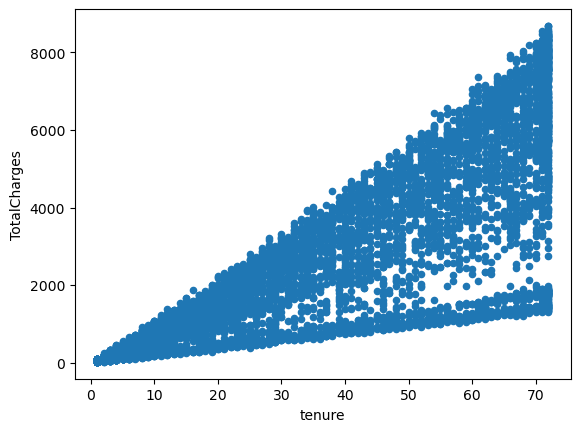

In [343]:
df.plot(kind = 'scatter', x = 'tenure', y = 'TotalCharges')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

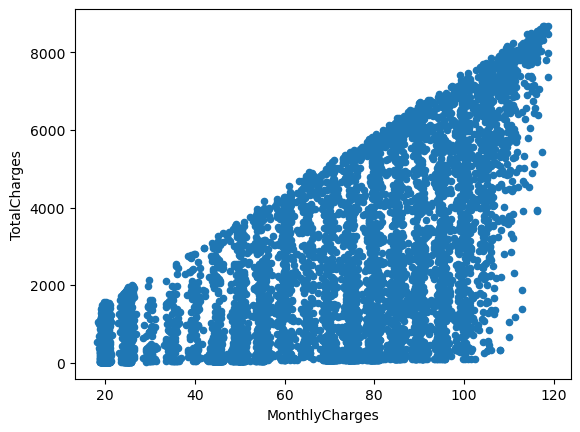

In [344]:
df.plot(kind = 'scatter', x = 'MonthlyCharges', y = 'TotalCharges')

### Encode Categorical and Standardize numerical data

In [345]:
df_cat = df_cat.astype('category')

In [346]:
for col in df_cat.columns:
    df_cat[col] = df_cat[col].cat.codes


In [347]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [348]:
numeric_df = df[['TotalCharges', 'MonthlyCharges', 'tenure', 'SeniorCitizen']]
df_cat = df_cat.join(numeric_df)
final_df = df_cat.copy()

In [349]:
final_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,TotalCharges,MonthlyCharges,tenure,SeniorCitizen
0,5375,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,29.85,29.85,1,0
1,3962,1,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,1889.50,56.95,34,0
2,2564,1,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,108.15,53.85,2,0
3,5535,1,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,1840.75,42.30,45,0
4,6511,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,151.65,70.70,2,0


In [350]:
final_df.MonthlyCharges = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()
final_df.TotalCharges = (df['TotalCharges'] - df['TotalCharges'].mean()) / df['TotalCharges'].std()
final_df.tenure = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()

In [351]:
final_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,TotalCharges,MonthlyCharges,tenure,SeniorCitizen
0,5375,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,-0.994123,-1.160241,-1.277354,0
1,3962,1,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,-0.173727,-0.259611,0.066323,0
2,2564,1,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,-0.959581,-0.362635,-1.236636,0
3,5535,1,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,-0.195234,-0.746482,0.514215,0
4,6511,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,-0.940391,0.197351,-1.236636,0


In [352]:
from sklearn.model_selection import train_test_split

y = final_df.Churn
X = final_df.drop(['customerID', 'Churn', 'TotalCharges'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

In [353]:
y_test.value_counts() #.Churn.value_counts(), y_train.Churn.value_counts()

0    1015
1     394
Name: Churn, dtype: int64

In [354]:
y_train.value_counts(), len(x_train.columns)

(0    4159
 1    1475
 Name: Churn, dtype: int64,
 18)

## Model Building

### Since the data is not highly dimentional from a feature perspective, I will opt for a model that was two dense layers and an output layer. Rescaling the data through the training process was more hurtful than helpful. I reduced the learning rate on the Adam optimizer, but mometum and other hyperpermeters were not helpful to adjust.

### I did include dropout in my model and measured loss by binary_crossintropy since the outputs are 1,0

In [355]:
import keras
import tensorflow as tf
from keras import Sequential
from keras import layers
from keras.layers import Dense 

In [408]:
model = Sequential()

model.add(Dense(32, input_dim = 18, kernel_initializer = 'random_normal', activation = 'relu'))
#model.add(layers.Rescaling(scale = 1./))

model.add(layers.Dropout(rate = .15))

model.add(Dense(16, kernel_initializer = 'random_normal',activation = 'relu'))
#model.add(layers.Rescaling(scale = 1./255))


model.add(layers.Dropout(rate = .15))
model.add(layers.Flatten())
model.add(Dense(1, kernel_initializer = 'random_normal', activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.experimental.Adam(learning_rate = .0001), metrics = ['accuracy'])

In [409]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 32)                608       
                                                                 
 dropout_53 (Dropout)        (None, 32)                0         
                                                                 
 dense_82 (Dense)            (None, 16)                528       
                                                                 
 dropout_54 (Dropout)        (None, 16)                0         
                                                                 
 flatten_19 (Flatten)        (None, 16)                0         
                                                                 
 dense_83 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-train

In [410]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience = 20, verbose = 1, mode = 'auto')
mod_checkpt = ModelCheckpoint(monitor = 'val_accuracy', filepath='./best_mod.b1', verbose = 1, save_best_only= True)

cb = [early_stop, mod_checkpt]


In [411]:
outcomes = model.fit(x = x_train, y = y_train, steps_per_epoch=2, epochs=100, callbacks=cb, 
                               verbose = 'auto', validation_data = (x_test, y_test))

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6931 - accuracy: 0.5027
Epoch 1: val_accuracy improved from -inf to 0.54791, saving model to ./best_mod.b1
2/2 [==============================] - 2s 1s/step - loss: 0.6930 - accuracy: 0.5146 - val_loss: 0.6928 - val_accuracy: 0.5479
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6929 - accuracy: 0.5261
Epoch 2: val_accuracy improved from 0.54791 to 0.59049, saving model to ./best_mod.b1
2/2 [==============================] - 1s 1s/step - loss: 0.6929 - accuracy: 0.5261 - val_loss: 0.6927 - val_accuracy: 0.5905
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6928 - accuracy: 0.5399
Epoch 3: val_accuracy improved from 0.59049 to 0.61817, saving model to ./best_mod.b1
2/2 [==============================] - 1s 1s/step - loss: 0.6927 - accuracy: 0.5563 - val_loss: 0.6925 - val_accuracy: 0.6182
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6926 - accuracy: 0.

## Training and validation comparisons

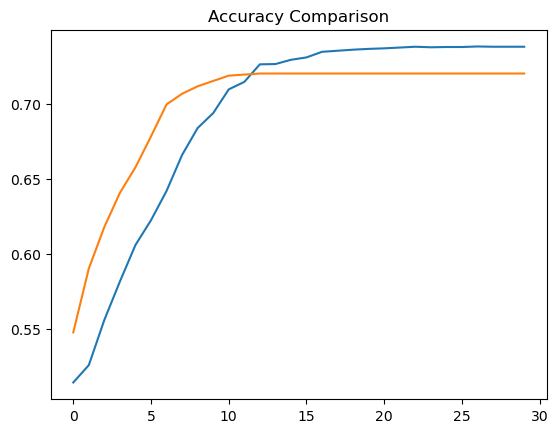

In [412]:

outcomes = outcomes.history

plt.plot(outcomes['accuracy'])
plt.plot(outcomes['val_accuracy'])
plt.title('Accuracy Comparison')

plt.show()

In [386]:
model.fit(x_train, y_train)

177/177 [==============================] - 1s 2ms/step - loss: 0.6712 - accuracy: 0.7382


In [389]:
pred = model.predict(x_test).ravel()

45/45 [==============================] - 0s 1ms/step


In [391]:
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, pred)

## ROC

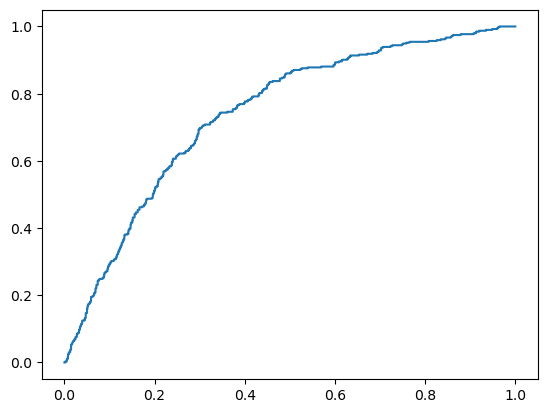

In [396]:
plt.plot(fpr_keras, tpr_keras)


## Conclusion

### It would seem that the model predicted responably well at 73%, however that is about the same proportion of the data that is labeled as churn. Tuning hyperparameters was minimal help. The final conclusion is that we need better data to make predictions. Making the model more complex only tended towards overfitting.